In [0]:
"""""""""""환경세팅"""""""""

'""환경세팅'

In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [0]:
!pip3 install -r ./Mask_RCNN/requirements.txt && cd Mask_RCNN && python3 setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling bu

In [0]:
!ls -al

total 24
drwxr-xr-x  1 root root 4096 Dec 10 07:52 .
drwxr-xr-x  1 root root 4096 Dec 10 07:51 ..
drwxr-xr-x 14 root root 4096 Dec 10 07:52 cnn
drwxr-xr-x  1 root root 4096 Dec  5 17:39 .config
drwxr-xr-x 10 root root 4096 Dec 10 07:52 Mask_RCNN
drwxr-xr-x  2 root root 4096 Dec  5 17:39 sample_data


In [0]:
!git clone https://dlehd14@bitbucket.org/dlehd14/cnn.git

fatal: destination path 'cnn' already exists and is not an empty directory.


In [0]:
"""""""""""데이터 검증"""""""""

'""데이터 검증'

In [0]:
!cd cnn&& ls -al

total 250080
drwxr-xr-x 14 root root      4096 Dec 10 07:52 .
drwxr-xr-x  1 root root      4096 Dec 10 07:52 ..
drwxr-xr-x  2 root root      4096 Dec 10 07:52 파노라마
drwxr-xr-x  2 root root      4096 Dec 10 07:52 1
drwxr-xr-x  2 root root      4096 Dec 10 07:52 2
drwxr-xr-x  2 root root      4096 Dec 10 07:52 3
drwxr-xr-x  2 root root      4096 Dec 10 07:52 4
drwxr-xr-x  2 root root      4096 Dec 10 07:52 5
drwxr-xr-x  2 root root      4096 Dec 10 07:52 6
-rw-r--r--  1 root root      2068 Dec 10 07:52 ccn.py
drwxr-xr-x  2 root root      4096 Dec 10 07:52 dataset
drwxr-xr-x  5 root root      4096 Dec 10 07:52 datasets
drwxr-xr-x  8 root root      4096 Dec 10 07:52 .git
drwxr-xr-x  2 root root      4096 Dec 10 07:52 Mask_RCNN
-rw-r--r--  1 root root 255965664 Dec 10 07:52 mask_rcnn_teeth_0010.h5
drwxr-xr-x  2 root root      4096 Dec 10 07:52 __pycache__
-rw-r--r--  1 root root      2622 Dec 10 07:52 README.md
-rw-r--r--  1 root root         0 Dec 10 07:52 test.h5
-rw-r--r--  1 root root   

In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

from cnn.test import TeethDataset,TeethConfig

# Root directory of the project
ROOT_DIR = os.path.abspath("./Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log


config = TeethConfig()
DATASET_DIR = os.path.join('./cnn', "/datasets")
dataset=TeethDataset()
dataset.load_teeth('./cnn/datasets',"train")


dataset.prepare()
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))


Using TensorFlow backend.


Image Count: 29
Class Count: 7
  0. BG                                                
  1. 1                                                 
  2. 2                                                 
  3. 3                                                 
  4. 4                                                 
  5. 5                                                 
  6. 6                                                 


[0, 24, 26, 27]


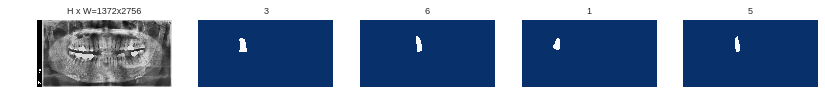

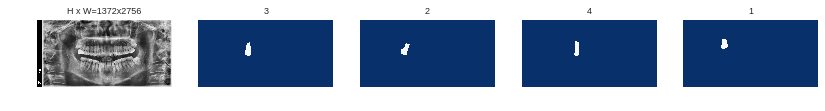

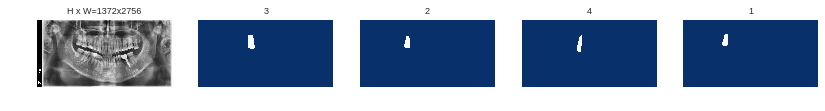

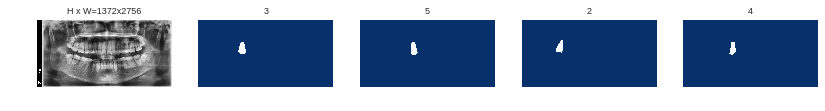

In [0]:
#polygon 개개별로 정한값
image_ids=[0,24,26,27]
#image_ids = np.random.choice(dataset.image_ids, 4)
print (image_ids)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  28 ./cnn/datasets/train/18112201.jpg
image                    shape: (1372, 2756, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1372, 2756, 6)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (6,)                  min:    1.00000  max:    6.00000  int32
bbox                     shape: (6, 4)                min:  412.00000  max: 1215.00000  int32


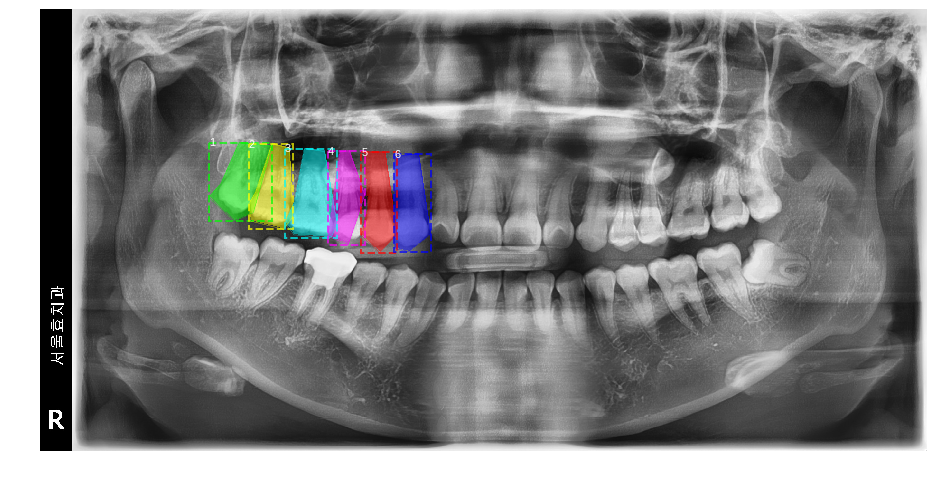

In [0]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id:  16 ./cnn/datasets/train/18111602.jpg
Original shape:  (1372, 2756, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (6,)                  min:    1.00000  max:    6.00000  int32
bbox                     shape: (6, 4)                min:  248.00000  max:  531.00000  int32


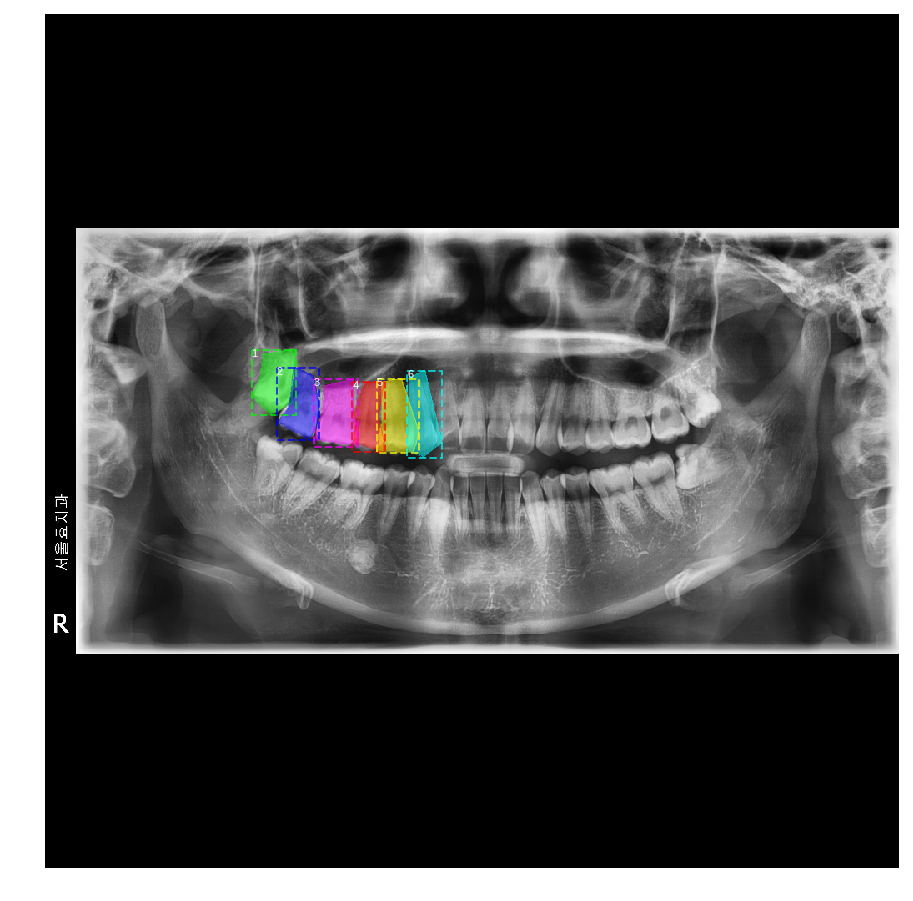

In [0]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (19,)                 min:    0.00000  max: 2756.00000  float64
class_ids                shape: (6,)                  min:    1.00000  max:    6.00000  int32
bbox                     shape: (6, 4)                min:  301.00000  max:  552.00000  int32
mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  uint8


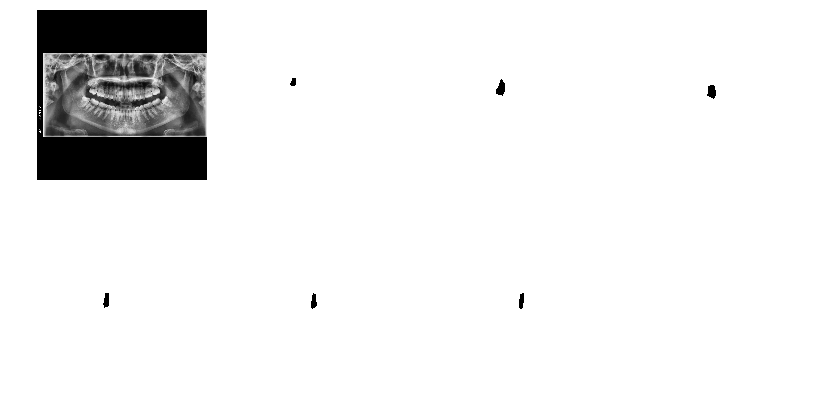

In [0]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

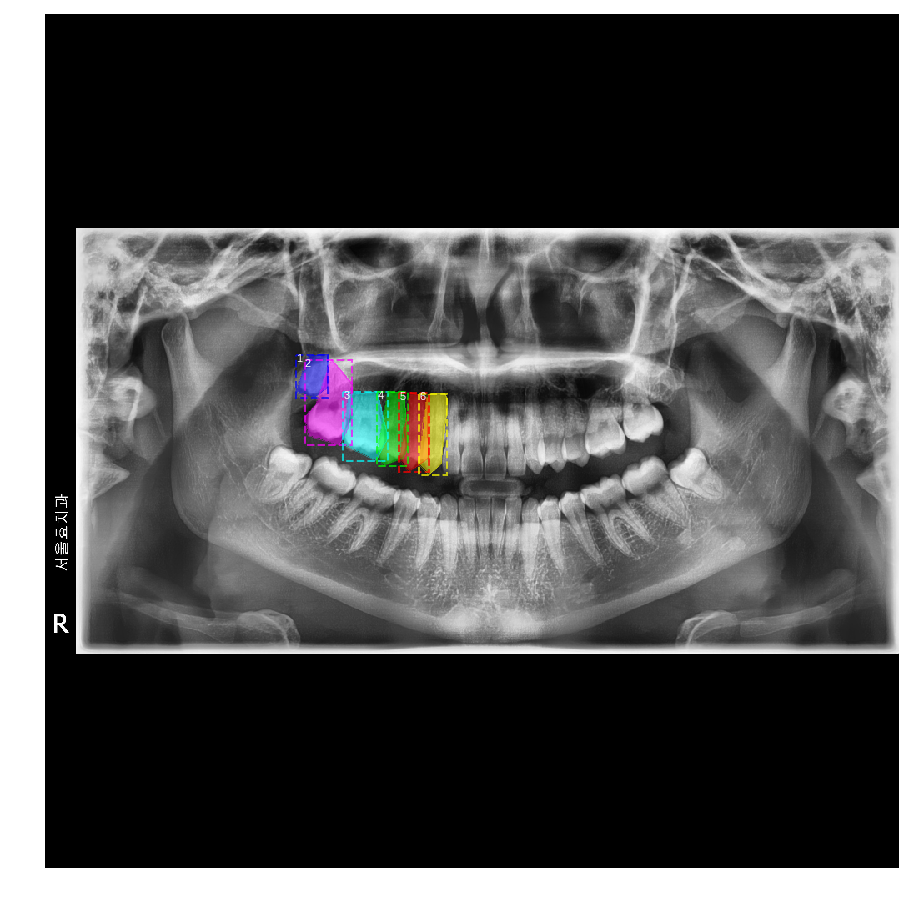

In [0]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 6)           min:    0.00000  max:    1.00000  bool


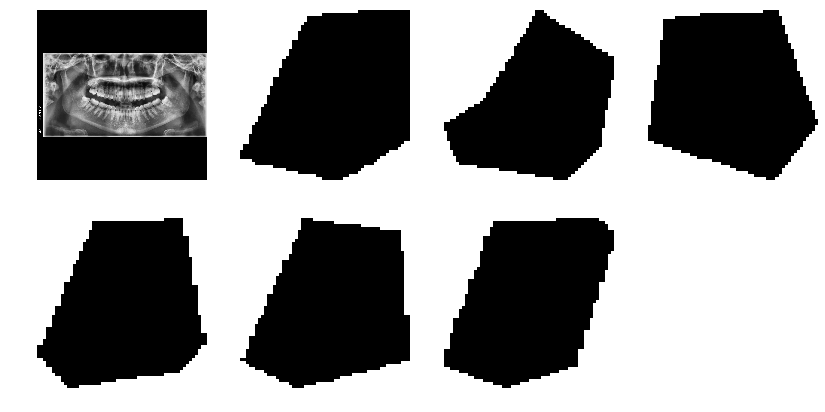

In [0]:

# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [0]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


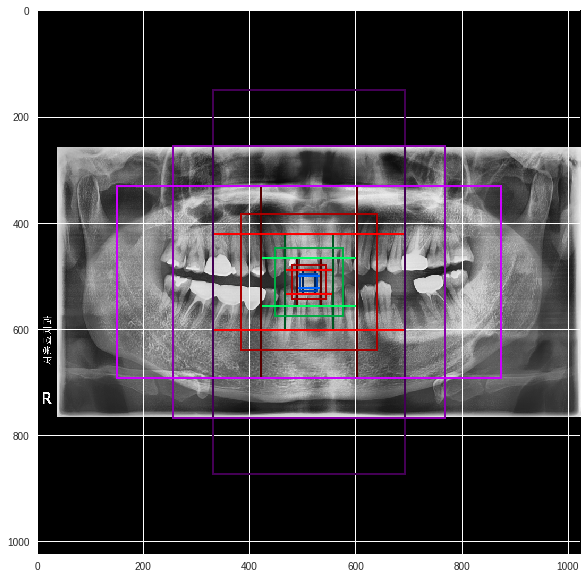

In [0]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

In [0]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [0]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 200, 4)           min:    2.00000  max: 1010.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    6.00000  int32
mrcnn_bbox               shape: (4, 200, 7, 4)        min:   -3.61111  max:    4.11765  float32
mrcnn_mask               shape: (4, 200, 28, 28, 7)   min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    6.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max:  552.00000  int32
gt_masks                 shape: (4, 56, 56, 100)      min:    0.00000  max:    1.00000  bool
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (4, 256, 4)           min:   -3.17128  max:    2.96875  float64
image_id:  23 ./cnn/datasets/train/18111907.jpg


anchors                  shape: (261888, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (11, 4)               min:  229.00000  max:  507.99997  float32
Positive anchors: 11
Negative anchors: 245
Neutral anchors: 261632
BG                     : 165
1                      : 8
2                      : 9
3                      : 2
4                      : 7
5                      : 6
6                      : 3


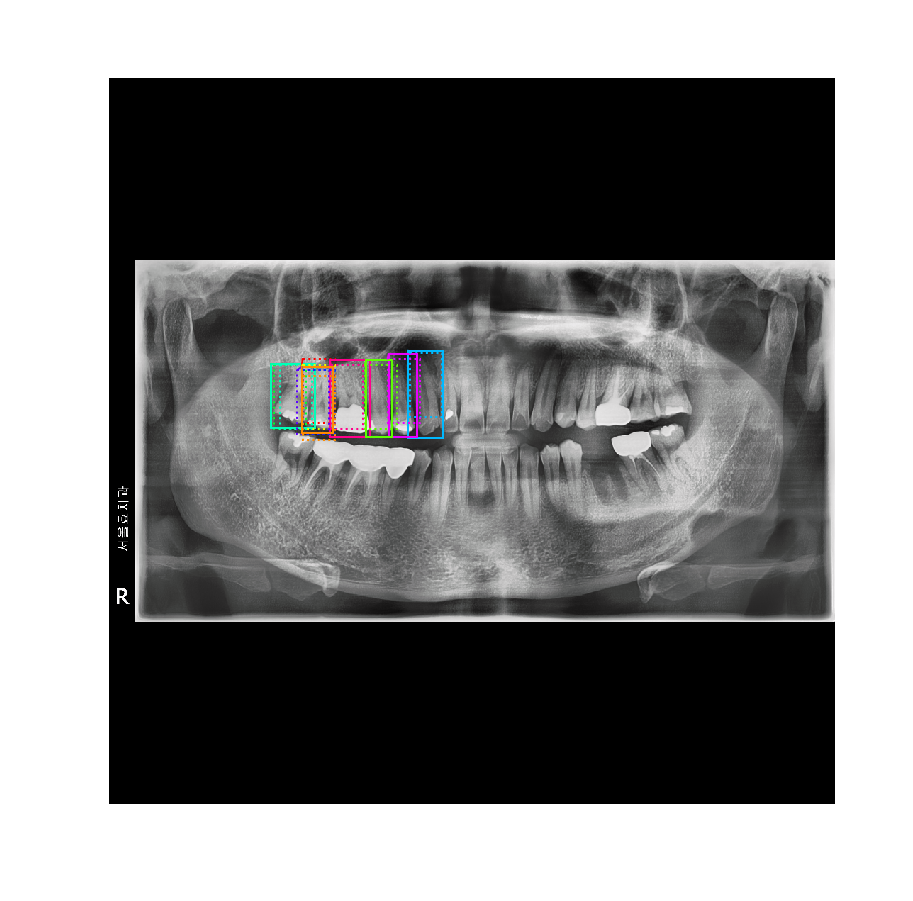

In [0]:
b = 3

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

Positive ROIs:  35
Negative ROIs:  165
Positive Ratio: 0.17
Unique ROIs: 200 out of 200


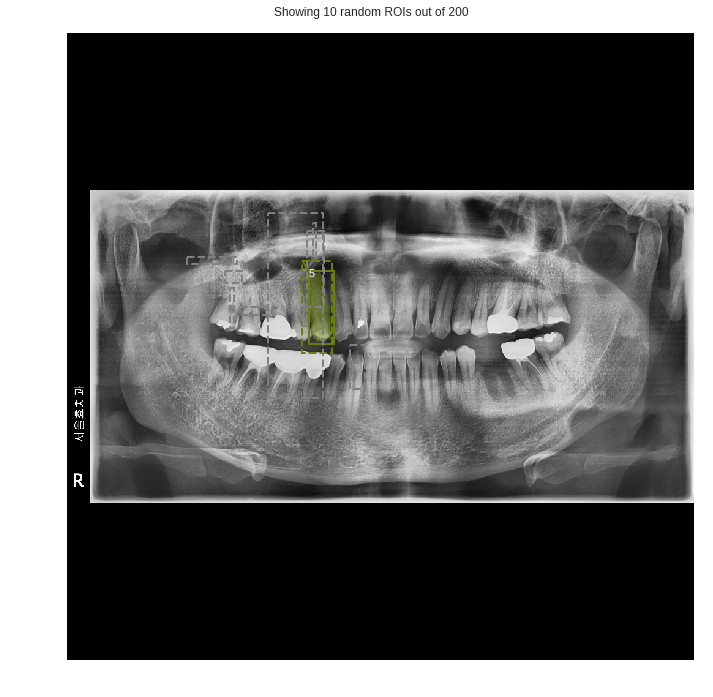

In [0]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

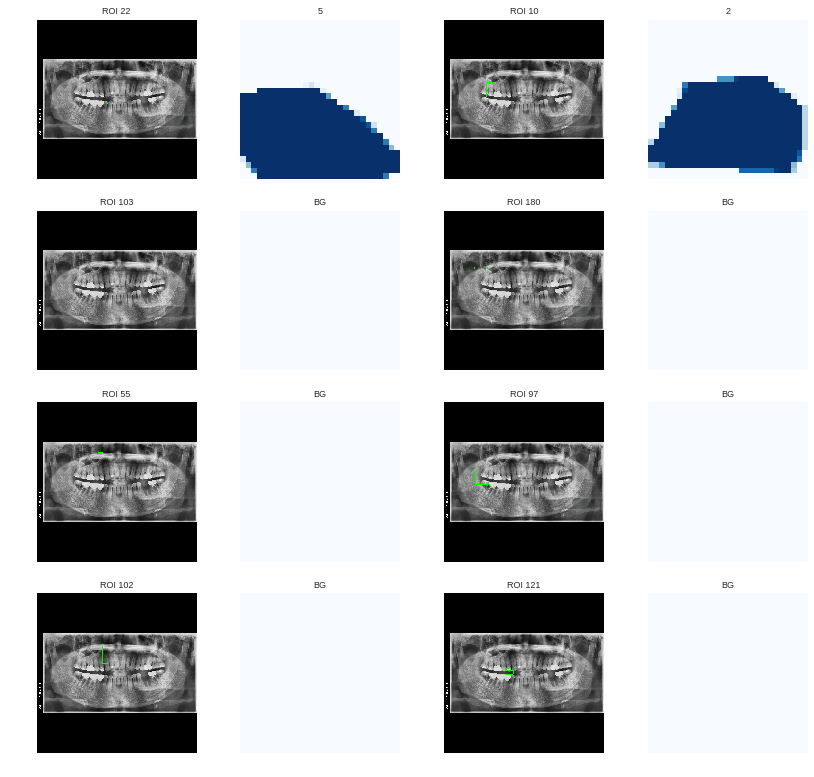

In [0]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [0]:
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33


In [0]:
"""""""""""모델 검증"""""""""

'""모델 검증'

In [0]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from cnn.test import TeethDataset,TeethConfig
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log


%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
TEETH_WEIGHTS_PATH = "./cnn/mask_rcnn_teeth_0010.h5"  # TODO: update this path

In [0]:
!cd cnn && ls -al

total 250080
drwxr-xr-x 14 root root      4096 Dec 10 07:52 .
drwxr-xr-x  1 root root      4096 Dec 10 07:52 ..
drwxr-xr-x  2 root root      4096 Dec 10 07:52 파노라마
drwxr-xr-x  2 root root      4096 Dec 10 07:52 1
drwxr-xr-x  2 root root      4096 Dec 10 07:52 2
drwxr-xr-x  2 root root      4096 Dec 10 07:52 3
drwxr-xr-x  2 root root      4096 Dec 10 07:52 4
drwxr-xr-x  2 root root      4096 Dec 10 07:52 5
drwxr-xr-x  2 root root      4096 Dec 10 07:52 6
-rw-r--r--  1 root root      2068 Dec 10 07:52 ccn.py
drwxr-xr-x  2 root root      4096 Dec 10 07:52 dataset
drwxr-xr-x  5 root root      4096 Dec 10 07:52 datasets
drwxr-xr-x  8 root root      4096 Dec 10 07:52 .git
drwxr-xr-x  2 root root      4096 Dec 10 07:52 Mask_RCNN
-rw-r--r--  1 root root 255965664 Dec 10 07:52 mask_rcnn_teeth_0010.h5
drwxr-xr-x  2 root root      4096 Dec 10 07:52 __pycache__
-rw-r--r--  1 root root      2622 Dec 10 07:52 README.md
-rw-r--r--  1 root root         0 Dec 10 07:52 test.h5
-rw-r--r--  1 root root   

In [0]:
config = TeethConfig()
TEETH_DIR = os.path.join('./cnn','./datasets')
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [0]:

# Load validation dataset
dataset = TeethDataset()
#dataset.load_teeth('./cnn/datasets', "test")
dataset.load_teeth('./cnn/datasets', "val")


# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 29
Classes: ['BG', '1', '2', '3', '4', '5', '6']


In [0]:
DEVICE="/gpu:0"

TEST_MODE="inference"

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [0]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
#
try:
  weights_path = model.find_last()
except:
  weights_path = TEETH_WEIGHTS_PATH

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  ./cnn/mask_rcnn_teeth_0010.h5


In [0]:
#!cd ./cnn/datasets/val && ls -al

In [0]:
#dataset.load_mask(0)

image ID: teeth.18111308.jpg (8) ./cnn/datasets/val/18111308.jpg
Processing 2 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (2, 19)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (6,)                  min:    1.00000  max:    6.00000  int32
gt_bbox                  shape: (6, 4)                min:  287.00000  max:  549.00000  int32
gt_mask                  shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  uint8


'\ndef random_colors(N, bright=True):\n    brightness = 1.0 if bright else 0.7\n    hsv = [(i / N, 1, brightness) for i in range(N)]\n    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))\n    random.shuffle(colors)\n    return colors\n\ndef apply_mask(image, mask, color, alpha=0.5):\n    for c in range(3):\n        image[:, :, c] = np.where(mask == 1,\n                                  image[:, :, c] *\n                                  (1 - alpha) + alpha * color[c] * 255,\n                                  image[:, :, c])\n    return image\n  \nmasks=r[\'masks\']\n\ncolors = random_colors(r[\'rois\'].shape[0])\nmasked_image = image.astype(np.uint32).copy()\nfor i in range(r[\'rois\'].shape[0]):\n  color = colors[i]\n  mask = masks[:,:,i]\n  masked_image = apply_mask(masked_image, mask, color)\n\nplt.imshow(masked_image.astype(np.uint8))\nplt.imsave("a.png",masked_image.astype(np.uint8))\n'

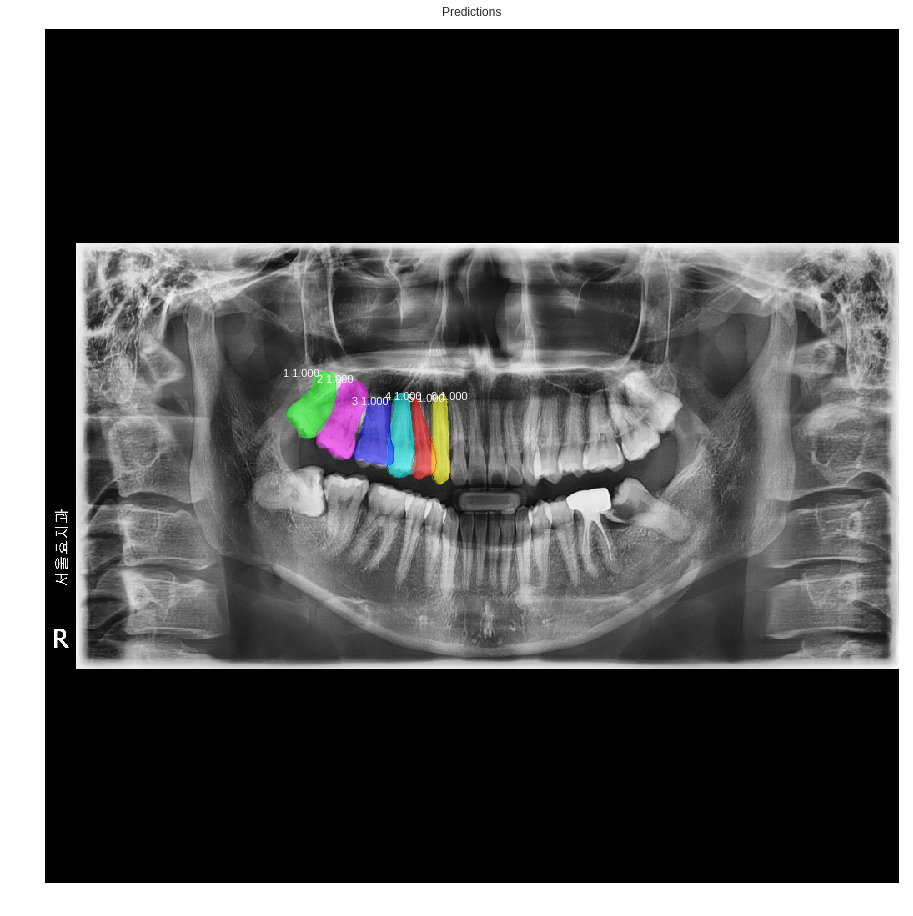

In [0]:
#import cv2
#im = cv2.imread("./cnn/datasets/val/17030605.jpg")
#print (im)
#from scipy import misc
#img = misc.imread('./cnn/datasets/val/15000279.jpg')
#type(img)
import skimage
import colorsys
image_id = random.choice(dataset.image_ids)
#image_id=0 #21 24 26 27
#print(image_id)
#image_id_batch_2 = random.choice(dataset.image_ids)

#image, image_meta, gt_class_id, gt_bbox, gt_mask =\
#    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

#print (gt_bbox)
#print (image)
info = dataset.image_info[image_id]


print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image,image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions",show_mask=True,show_bbox=False,)

log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)


#For save
"""
def random_colors(N, bright=True):
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def apply_mask(image, mask, color, alpha=0.5):
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image
  
masks=r['masks']

colors = random_colors(r['rois'].shape[0])
masked_image = image.astype(np.uint32).copy()
for i in range(r['rois'].shape[0]):
  color = colors[i]
  mask = masks[:,:,i]
  masked_image = apply_mask(masked_image, mask, color)

plt.imshow(masked_image.astype(np.uint8))
plt.imsave("a.png",masked_image.astype(np.uint8))
"""

In [0]:
!ls -al

total 24
drwxr-xr-x  1 root root 4096 Dec 10 07:52 .
drwxr-xr-x  1 root root 4096 Dec 10 07:51 ..
drwxr-xr-x 14 root root 4096 Dec 10 07:52 cnn
drwxr-xr-x  1 root root 4096 Dec  5 17:39 .config
drwxr-xr-x 10 root root 4096 Dec 10 07:52 Mask_RCNN
drwxr-xr-x  2 root root 4096 Dec  5 17:39 sample_data


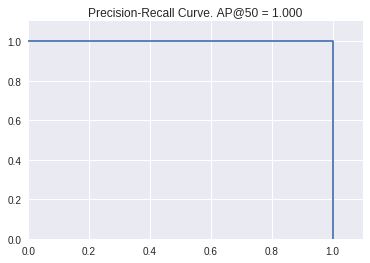

In [0]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

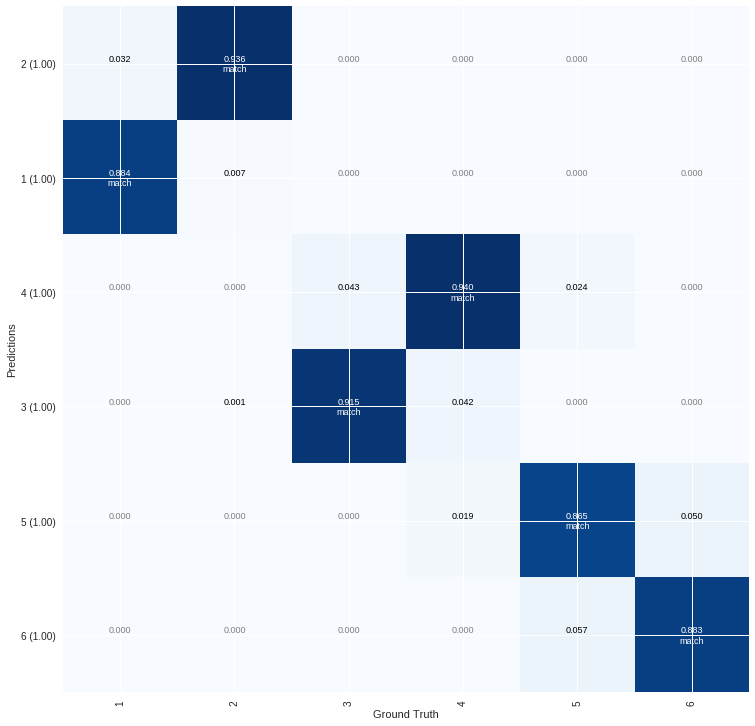

In [0]:
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset.class_names)

In [0]:
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )

target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -3.17128  max:    1.79688  float64
positive_anchors         shape: (13, 4)               min:  288.00000  max:  541.25483  float64
negative_anchors         shape: (243, 4)              min:  -45.25483  max: 1066.50967  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (13, 4)               min:  287.00000  max:  549.00000  float32


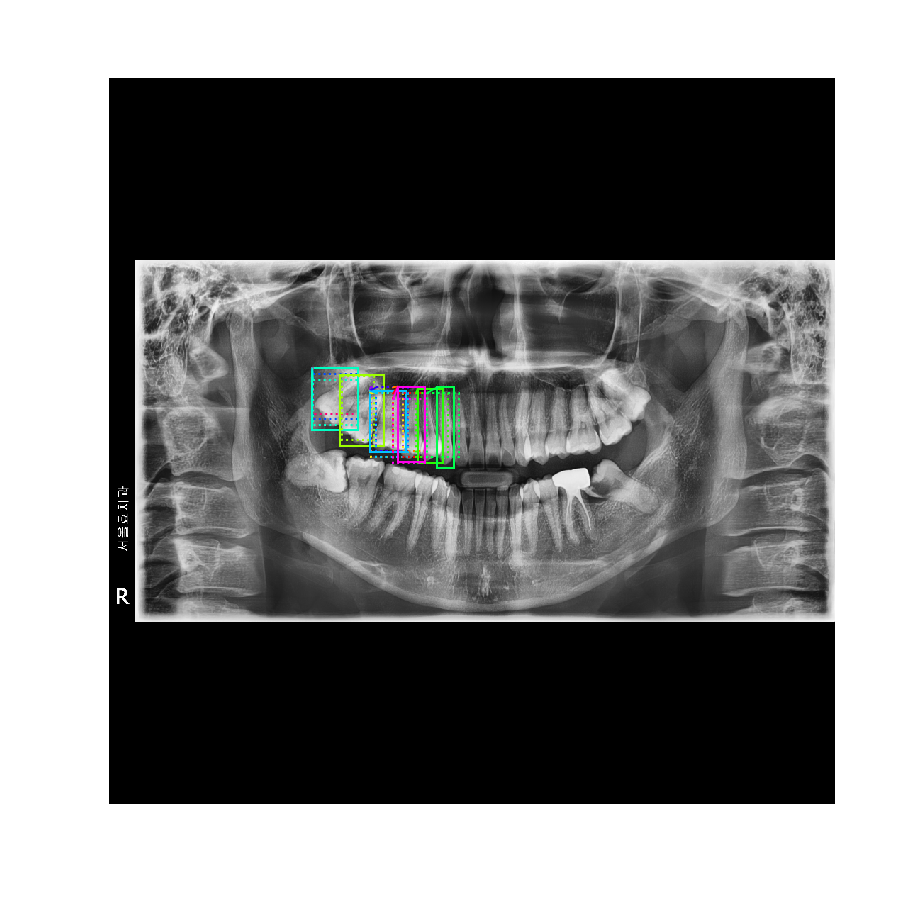

In [0]:
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

In [0]:
!ls -al

total 24
drwxr-xr-x  1 root root 4096 Dec 10 07:52 .
drwxr-xr-x  1 root root 4096 Dec 10 07:51 ..
drwxr-xr-x 14 root root 4096 Dec 10 07:52 cnn
drwxr-xr-x  1 root root 4096 Dec  5 17:39 .config
drwxr-xr-x 10 root root 4096 Dec 10 07:52 Mask_RCNN
drwxr-xr-x  2 root root 4096 Dec  5 17:39 sample_data


In [0]:
from google.colab import files
files.download('a.png')
#logs/teeth20181207T0411/mask_rcnn_teeth_0010.h5
#./cnn/splash_20181207T111434.png

FileNotFoundError: ignored

In [0]:
#!cd cnn/datasets/val && ls -al

In [0]:
#!cd cnn && git pull

In [0]:
"""가중치 상태"""

In [0]:
visualize.display_weight_stats(model)